# Heart Failure Event Prediction: Machine Learning Approach

### Dataset :

- age: Age of the patient (years)
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (binary, 1 for male, 0 for female)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- death_event: If the patient died during the follow-up period (boolean)



**Dataset credits:** Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.



In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , roc_curve , auc
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

### 1: Data Preprocessing and Exploratory Data Analysis


In [54]:
df = pd.read_csv("heart_failure_clinical_records.csv")
print(f"Rows : {df.shape[0]}  Columns : {df.shape[1]}")
print("Few rows of data set :")
df.head(10)

Rows : 5000  Columns : 13
Few rows of data set :


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


In [55]:
# Check for missing values 
print("Missing values :")
print(df.isna().sum())

Missing values :
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


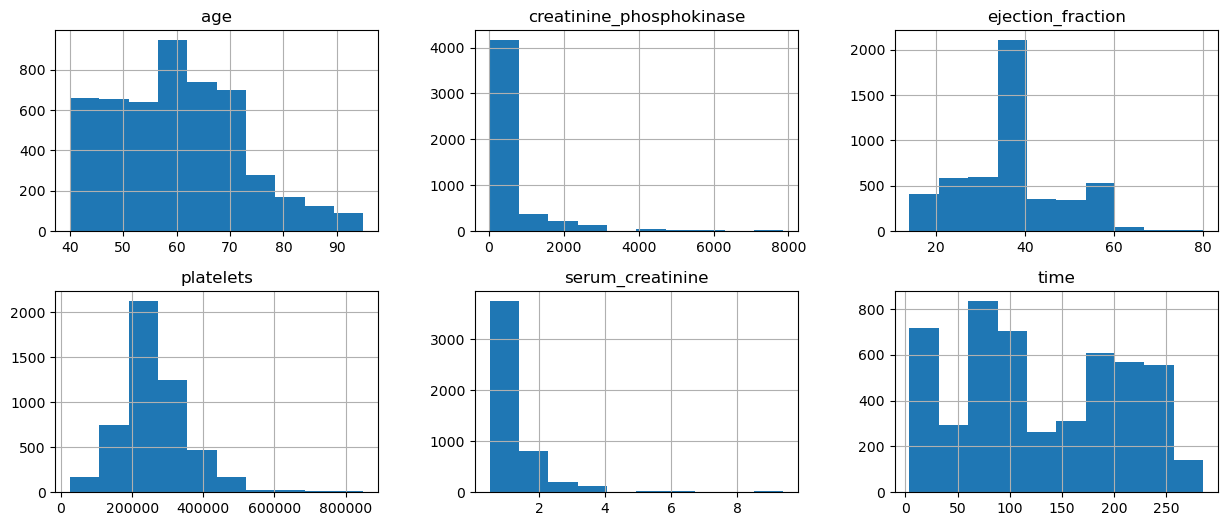

In [56]:
# Perform basic statistical analysis and visualization to understand the distribution of each feature
df[['age' ,'creatinine_phosphokinase' , 'ejection_fraction' , 'platelets' , 'serum_creatinine', 'time']].hist(bins = 10 ,figsize = (15,6) , layout=(2,3))
plt.show()

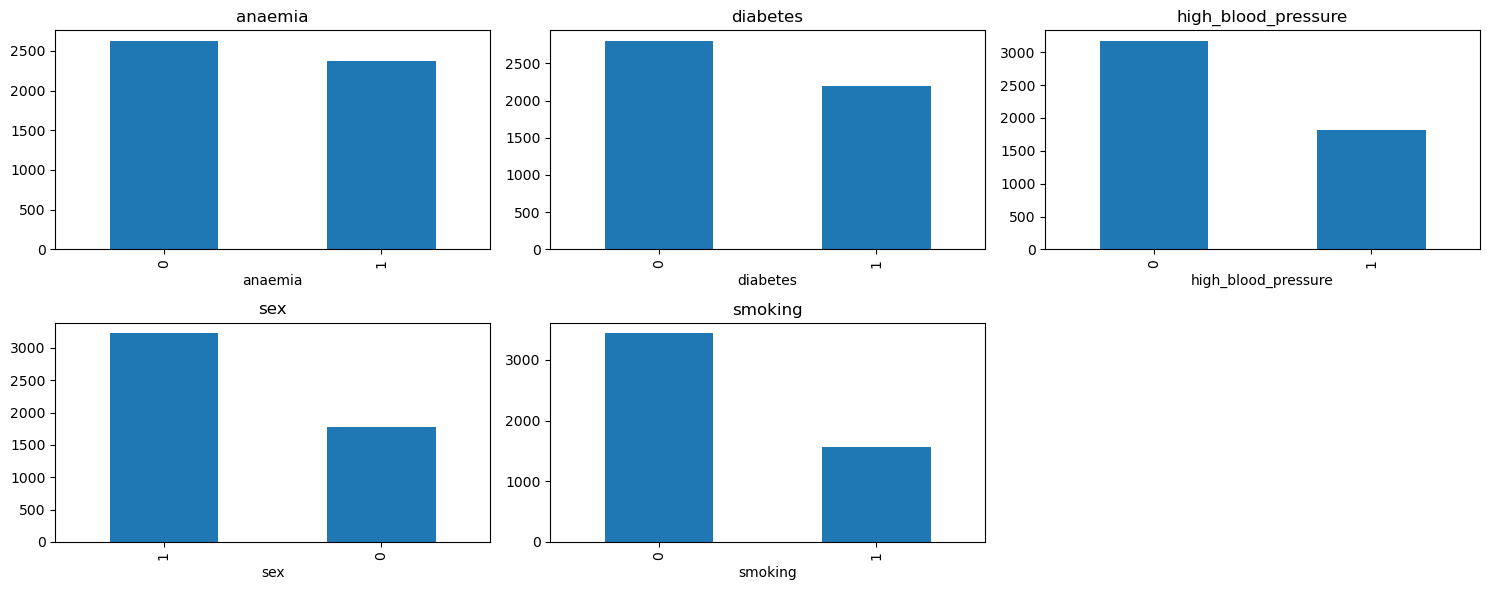

In [57]:
fig , axes = plt.subplots(2,3 , figsize = (15 ,6))
axes = axes.flatten()

for i , column in enumerate(['anaemia','diabetes' , 'high_blood_pressure','sex','smoking']):
    df[column].value_counts().plot(kind='bar' , ax = axes[i] , title = column)
    
    
for j in range(len(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###  2: Feature Transformation



In [58]:
# Split the dataset into training and test sets
X = df.drop("death_event",axis = 1 )
y = df['death_event']


In [59]:
# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train , X_test , y_train , y_test =  train_test_split(X_scaled , y , test_size = 0.25 , random_state = 42)

### 3: Model Training and Evaluation with GaussianNB


In [69]:
# Initialize and train a GaussianNB model

model_GNB = GaussianNB()
model_GNB.fit(X_train , y_train)

# Print the classification report
y_pred_GNB = model_GNB.predict(X_test)
report = classification_report(y_test , y_pred_GNB)
print("Classification Report GNB :")
print(report)

Classification Report GNB :
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [70]:
# Calculate the AUC for the GaussianNB model.

probabilities_GNB = model_GNB.predict_proba(X_test)
fpr_GNB , tpr_GNB , threshold_GNB = roc_curve(y_test , probabilities_GNB[:,1])
area_GNB = auc(fpr_GNB , tpr_GNB)
print("Area under curve : ", area_GNB)

Area under curve :  0.8790854196850709


In [76]:
# Find the probability threshold associated with 85% recall
desired_recall = 0.85
closest_index = np.argmin(abs(tpr_GNB - desired_recall))

print(f"Threshold for {desired_recall} recall : {threshold_GNB[closest_index]}")

y_pred_GNB_updated_threshold = (probabilities_GNB[:,1] > threshold_GNB[closest_index] ).astype(int)

report = classification_report(y_test , y_pred_GNB_updated_threshold)

print("classification Report For updated Threshold GNB :")
print(report)

Threshold for 0.85 recall : 0.09000947875551764
classification Report For updated Threshold GNB :
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       881
           1       0.55      0.85      0.67       369

    accuracy                           0.75      1250
   macro avg       0.73      0.78      0.73      1250
weighted avg       0.81      0.75      0.76      1250



### 4: Model Training and Evaluation with SVM


In [83]:
# Initialize and train an SVM model with a linear kernel

model_SVM = SVC(kernel = "linear" , probability = True)
model_SVM.fit(X_train , y_train)

# Print the classification report
y_pred_SVM = model_SVM.predict(X_test)
report = classification_report(y_test , y_pred_SVM)
print("Classification Report SVM :")
print(report)


Classification Report SVM :
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [88]:
# Calculate the AUC
probabilities_SVM = model_SVM.predict_proba(X_test)
fpr_SVM , tpr_SVM , threshold_SVM = roc_curve(y_test , probabilities_SVM[:,1])
area_SVM = auc(fpr_SVM , tpr_SVM)
print("Area under Curve : ", area_SVM)

Area under Curve :  0.893220010520196


In [92]:
# Find the probability threshold associated with 90% recall
desired_recall = 0.90
closest_index = np.argmin(abs(tpr_SVM - desired_recall))

print("Threshold for 90% Recall : ",threshold_SVM[closest_index])

y_pred_SVM_updated_threshold = (probabilities_SVM[:,1] > threshold_SVM[closest_index]).astype(int)
report = classification_report(y_test , y_pred_SVM_updated_threshold)

print("Classification Report Updated Threshold SVM :")
print(report)

Threshold for 90% Recall :  0.17784853981424487
Classification Report Updated Threshold SVM :
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       881
           1       0.53      0.89      0.66       369

    accuracy                           0.73      1250
   macro avg       0.73      0.78      0.72      1250
weighted avg       0.81      0.73      0.74      1250



### 5: Model Training and Evaluation with XGBoost


In [93]:

# Initialize and train an XGBoost model
model_XGB = XGBClassifier()
model_XGB.fit(X_train , y_train)


# Print the classification report
y_pred_XGB = model_XGB.predict(X_test)
report = classification_report(y_test , y_pred)
print("Classification Report XGB :")
print(report)


Classification Report XGB :
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [113]:
# Calculate the AUC
probabilities_XGB = model_XGB.predict_proba(X_test)
fpr_XGB , tpr_XGB , threshold_XGB = roc_curve(y_test , probabilities_XGB[:,1])
area_XGB = auc(fpr_XGB , tpr_XGB)
print("Area under curve : ",area_XGB)



Area under curve :  0.9991971429362421


In [114]:
desired_recall = 0.85
closest_index = np.argmin(abs(tpr_XGB - desired_recall))
print("Threshold for 85% recall : ",threshold_XGB[closest_index])

y_pred_XGB_updated_threshold = (probabilities_XGB[:,1] > threshold_XGB[closest_index]).astype(int)
report = classification_report(y_test , y_pred_XGB_updated_threshold)
print("Classification Report Updated Threshold XGB :")
print(report)

Threshold for 85% recall :  0.99227107
Classification Report Updated Threshold XGB :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       881
           1       1.00      0.84      0.91       369

    accuracy                           0.95      1250
   macro avg       0.97      0.92      0.94      1250
weighted avg       0.96      0.95      0.95      1250



###  6: Summary and Conclusion


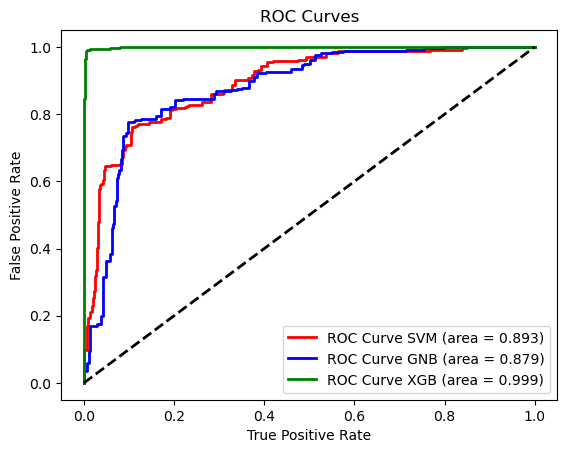

In [111]:
# Plot the ROC curves for all models
plt.figure()
plt.plot(fpr_SVM , tpr_SVM , color = 'red' , lw = 2, label = "ROC Curve SVM (area = %0.3f)"% area_SVM)
plt.plot(fpr_GNB , tpr_GNB , color = 'blue' , lw = 2, label = "ROC Curve GNB (area = %0.3f)"% area_GNB)
plt.plot(fpr_XGB , tpr_XGB , color = 'green' , lw = 2, label = "ROC Curve XGB (area = %0.3f)"% area_XGB)
plt.plot([0,1] , [0,1] , color = 'black' , lw = 2, linestyle ='--' )
plt.legend(loc ='lower right')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curves")
plt.show()

### Conclusion

1. Gaussian NB model :
    - Accuracy : 0.80
    - AUC      : 0.87
    - Show a baseline performace achiving 47% recall of positive class   
2. SVM Model:
    - Accuracy: 0.85
    - AUC: 0.89
    - Shows improvement over GaussianNB, achieving a recall of 76% for the positive class.  
3. XGBoost Model:
    - Accuracy: 0.99
    - AUC: 1.00
    - Outperforms other models, providing superior performance and generalization.

-In summary , while GaussianNB , and SVM model provide reasonable performance , XGBoost model achives higher accuracy and AUC , 
 making them more suitable for this classification task , XGBOOST , in particular , shows the best overall performance , making it the ideal choise for the heart failure classification

